In [51]:
## Source of base script: https://github.com/Yifeng-He/Deep-Learning-Time-Series-Prediction-using-LSTM-Recurrent-Neural-Networks/blob/master/vix_prediction_LSTM.py

import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM, SimpleRNN
from keras.models import Sequential

np.random.seed(1234)

In [52]:
vixcurrent = pd.read_csv('vixcurrent.csv', sep=',')
#remove last observation to have an even 3560 observations. This is important for our sequence_length
vector_vix = vixcurrent[:-1]
vector_vix = vixcurrent[vixcurrent.columns[4]].as_matrix()

In [53]:
#create a matrix containing lists of 20 items. The last item is the number we want to predict. 
# The preceeding 19 items are the time series entries before the last item. I.e. [t-19, t-18, t-17.....t]
sequence_length = 20
def convertSeriesToMatrix(vectorSeries, sequence_length):
    matrix=[]
    for i in range(len(vectorSeries)-sequence_length+1):
        matrix.append(vectorSeries[i:i+sequence_length])
    return matrix

matrix_vix = convertSeriesToMatrix(vector_vix, sequence_length)
matrix_vix = np.array(matrix_vix)
train_row = int(round(0.9 * matrix_vix.shape[0]))
train_set = matrix_vix[:train_row, :]

In [54]:
# shift all data by training mean
training_mean = train_set.mean()
matrix_vix -= training_mean
train_set = matrix_vix[:train_row, :]

#shuffle training dataset
np.random.shuffle(train_set)

# the training set
X_train = train_set[:, :-1]
# the last column is the true value to compute the mean-squared-error loss
y_train = train_set[:, -1] 
# the test set
X_test = matrix_vix[train_row:, :-1]
y_test = matrix_vix[train_row:, -1]

In [55]:
# Run the following two lines only if the LSTM or RNN models are created
# the input to LSTM layer needs to have the shape of (number of samples, the dimension of each element)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# LSTM, LSTM model with Dense (linear) Output Layer

In [56]:
#### Model: LSTM, LSTM, Dense (linear)
# build the model
model = Sequential()
# layer 1: LSTM
model.add(LSTM( input_shape=(X_train.shape[1], X_train.shape[2]), output_dim=50, return_sequences=True))
model.add(Dropout(0.2))
# layer 4: LSTM
model.add(LSTM(output_dim=100, return_sequences=False))
model.add(Dropout(0.2))
# Output Layer: dense
# linear activation: a(x) = x
model.add(Dense(output_dim=1, activation='linear'))
# compile the model
model.compile(loss="mse", optimizer="rmsprop")

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(input_shape=(19, 1), return_sequences=True, units=50)`
  """
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=False, units=100)`
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  if sys.path[0] == '':


# RNN, RNN model with Dense (linear) Output Layer

In [67]:
#### Model: RNN, RNN, Dense (linear)
# build the model
model = Sequential()
# layer 1: RNN
model.add(SimpleRNN( input_shape=(X_train.shape[1], X_train.shape[2]), output_dim=50, return_sequences=True))
model.add(Dropout(0.2))
# layer 2: RNN
model.add(SimpleRNN(output_dim=100, return_sequences=False))
model.add(Dropout(0.2))
# Output Layer: dense
# linear activation: a(x) = x
model.add(Dense(output_dim=1, activation='linear'))
# compile the model
model.compile(loss="mse", optimizer="rmsprop")

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `SimpleRNN` call to the Keras 2 API: `SimpleRNN(input_shape=(19, 1), return_sequences=True, units=50)`
  """
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `SimpleRNN` call to the Keras 2 API: `SimpleRNN(return_sequences=False, units=100)`
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  if sys.path[0] == '':


# Dense (linear) Multi-Layer model

In [5]:
#### Model: Dense (linear), Dense (linear), Dense (linear)
# build the model
model = Sequential()
# Layer 1: dense 10 node hidden NN layer with linear activation
model.add(Dense(10, input_dim=sequence_length - 1, activation='linear'))
model.add(Dropout(0.2))
# Layer 2: dense 10 node hidden NN layer with linear activation
model.add(Dense(10, activation='linear'))
model.add(Dropout(0.2))
# Output Layer: dense
# linear activation: a(x) = x
model.add(Dense(output_dim=1, activation='linear'))
# compile the model
model.compile(loss="mse", optimizer="rmsprop")

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  if sys.path[0] == '':


# Dense (linear) Single Layer model

In [ ]:
#### Model: Dense (linear)
# build the model
model = Sequential()
# Layer 1: dense 10 node hidden NN layer with linear activation
model.add(Dense(10, input_dim=sequence_length - 1, activation='linear'))
model.add(Dropout(0.2))
# Output Layer
model.add(Dense(1))
# compile the model
model.compile(loss="mse", optimizer="rmsprop")

In [58]:
# train the model
model.fit(X_train, y_train, batch_size=512, nb_epoch=100, validation_split=0.05, verbose=1)

C:\Users\User\Anaconda3\lib\site-packages\keras\models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 3028 samples, validate on 160 samples
Epoch 1/100
3028/3028 [==============================] - 10s 3ms/step - loss: 67.2563 - val_loss: 50.4109
Epoch 2/100
3028/3028 [==============================] - 5s 2ms/step - loss: 42.2372 - val_loss: 38.7849
Epoch 3/100
3028/3028 [==============================] - 4s 1ms/step - loss: 32.9666 - val_loss: 32.5695
Epoch 4/100
3028/3028 [==============================] - 4s 1ms/step - loss: 28.7291 - val_loss: 28.7777
Epoch 5/100
3028/3028 [==============================] - 5s 2ms/step - loss: 25.7789 - val_loss: 26.2467
Epoch 6/100
3028/3028 [==============================] - 4s 1ms/step - loss: 23.7636 - val_loss: 24.3939
Epoch 7/100
3028/3028 [==============================] - 4s 1ms/step - loss: 22.6163 - val_loss: 22.8752
Epoch 8/100
3028/3028 [==============================] - 4s 1ms/step - loss: 21.1201 - val_loss: 21.9877
Epoch 9/100
3028/3028 [==============================] - 5s 2ms/step - loss: 20.1068 - val_loss: 20.3973
Epoch 1

Epoch 79/100
3028/3028 [==============================] - 5s 2ms/step - loss: 3.7487 - val_loss: 2.1759
Epoch 80/100
3028/3028 [==============================] - 5s 2ms/step - loss: 3.7122 - val_loss: 2.6162
Epoch 81/100
3028/3028 [==============================] - 5s 2ms/step - loss: 3.8033 - val_loss: 2.6002
Epoch 82/100
3028/3028 [==============================] - 5s 2ms/step - loss: 3.8064 - val_loss: 2.4461
Epoch 83/100
3028/3028 [==============================] - 5s 2ms/step - loss: 3.4942 - val_loss: 1.8809
Epoch 84/100
3028/3028 [==============================] - 4s 1ms/step - loss: 3.7159 - val_loss: 2.1839
Epoch 85/100
3028/3028 [==============================] - 5s 2ms/step - loss: 3.6245 - val_loss: 2.1352
Epoch 86/100
3028/3028 [==============================] - 5s 2ms/step - loss: 3.5282 - val_loss: 1.9293
Epoch 87/100
3028/3028 [==============================] - 5s 2ms/step - loss: 3.7912 - val_loss: 2.4197
Epoch 88/100
3028/3028 [==============================] - 5s 1ms

352/352 [==============================] - 0s 841us/step

The mean squared error (MSE) on the test data set is 2.480 over 352 test samples.


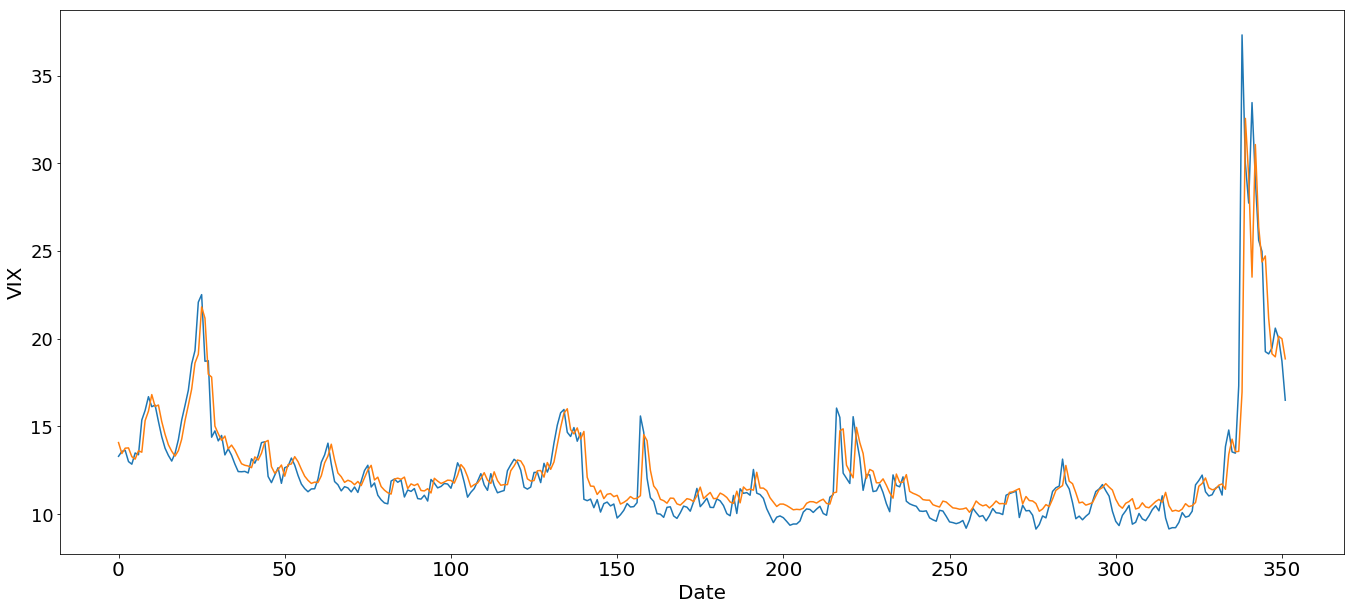

In [50]:
# evaluate the result
test_mse = model.evaluate(X_test, y_test, verbose=1)
print ('\nThe mean squared error (MSE) on the test data set is %.3f over %d test samples.' % (test_mse, len(y_test)))

# get the predicted values
predicted_values = model.predict(X_test)
num_test_samples = len(predicted_values)
predicted_values = np.reshape(predicted_values, (num_test_samples,1))

# plot the results
fig = plt.figure()
plt.plot(y_test + training_mean)
plt.plot(predicted_values + training_mean)

# Change the plot figure width and height
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 23
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

params = {'xtick.labelsize': 20, 'ytick.labelsize': 18, 'axes.titlesize':20}
plt.rcParams.update(params)

plt.xlabel('Date', fontsize = 20)
plt.ylabel('VIX', fontsize = 20)



fig.savefig('output_prediction.jpg', bbox_inches='tight')

plt.show()

# 